In [42]:
from scipy.stats import norm
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/df_clean.csv',parse_dates=True,index_col=['SoldTime','Id'])

In [5]:
df.head()

,,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SoldTime,Id,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,0,2,2008,208500
2007-05-01,2,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,0,5,2007,181500
2008-09-01,3,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,0,9,2008,223500
2006-02-01,4,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,35,272,0,0,0,0,2,2006,140000
2008-12-01,5,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
df['PPLSF'] = df.SalePrice/df.GrLivArea

## Obeservation 1: Is there a price_per_livingArea_square_feet (PPLSF) diffenence between 1 story and multiple story house

In [87]:
story1 = df.loc[df.HouseStyle == '1Story']

In [88]:
n1 = story1.shape[0]
n1

726

In [89]:
story2 = df.loc[df.HouseStyle != '1Story']


In [90]:
n2 = story2.shape[0]
n2

734

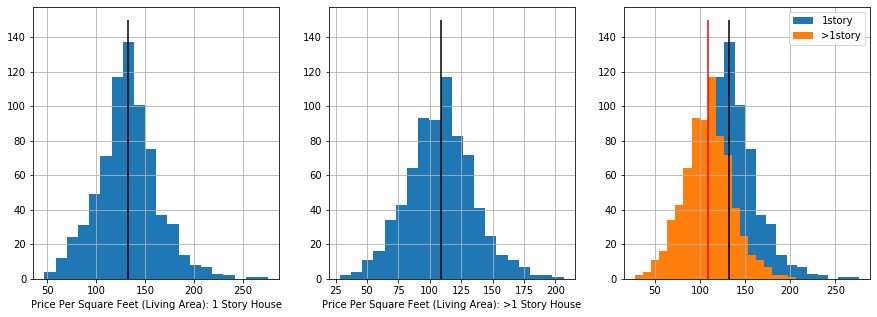

In [91]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(131)
ax1 = story1.PPLSF.hist(bins=20)
plt.xlabel('Price Per Square Feet (Living Area): 1 Story House')
ax1.vlines(story1.PPLSF.mean(),ymin=0,ymax=150)
ax2 = fig.add_subplot(132)
ax2 = story2.PPLSF.hist(bins=20)
plt.xlabel('Price Per Square Feet (Living Area): >1 Story House')
ax2.vlines(story2.PPLSF.mean(),ymin=0,ymax=150)
ax3 = fig.add_subplot(133)
ax3 = story1.PPLSF.hist(bins=20,label = '1story')
ax3 = story2.PPLSF.hist(bins=20,label = '>1story')
ax3.vlines(story2.PPLSF.mean(),ymin=0,ymax=150,color='r')
ax3.vlines(story1.PPLSF.mean(),ymin=0,ymax=150,color='k')
plt.legend()

## It looks like PPLSF for multi-story house is lower than 1 story house, then I would like to test it by making 'Null Hypothesis': price_per_livingArea_square_feet (PPLSF) is equal between 1 story and multiple story houses

In [92]:
story1_mean = story1.PPLSF.mean()
story1_sd = story1.PPLSF.std(ddof=1)
story2_mean = story2.PPLSF.mean()
story2_sd = story2.PPLSF.std(ddof=1)

In [93]:
story1_mean,story1_sd,story2_mean,story2_sd

(132.71900297063425, 31.298995398473032, 108.55913600857185, 26.49165405918185)

### First method, directly using t-test

In [94]:
ttest_ind(story1.PPLSF,story2.PPLSF,equal_var = True) 

Ttest_indResult(statistic=15.9259878990733, pvalue=9.015848818873706e-53)

#### p < 0.05 (Type1 error sheldhood alpha = 0.05), reject hypothesis

### Second method, using bootstrap

In [95]:
# bootstrap distribution centered at 0
bs_story1 = pd.DataFrame({'m':[story1.PPLSF.sample(n1,replace=True).mean()-story1_mean for i in range(10000)]})
bs_story2 = pd.DataFrame({'m':[story2.PPLSF.sample(n2,replace=True).mean()-story2_mean for i in range(10000)]})

In [96]:
# difference between two groups
dif = bs_story1.m - bs_story2.m

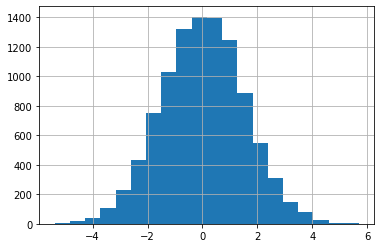

In [97]:
dif.hist(bins=20)

In [98]:
# the observed difference
obs_dif = story1_mean - story2_mean

In [99]:
# the probability to see this observation
p = np.sum(np.abs(dif) > obs_dif) / len(dif)
p

0.0

#### p value is too small, reject null hypothesis. 
## Conclusion: multi-story house has lower price_per_livingArea_square_feet

## Observation 2: whether housing price is different in different years

In [75]:
df.YrSold.min(),df.YrSold.max()

(2006, 2010)

In [82]:
Y2006 = df.loc[df.YrSold == 2006].PPLSF
Y2007 = df.loc[df.YrSold == 2007].PPLSF
Y2008 = df.loc[df.YrSold == 2008].PPLSF
Y2009 = df.loc[df.YrSold == 2009].PPLSF
Y2010 = df.loc[df.YrSold == 2010].PPLSF

In [80]:
Y2006.shape[0],Y2007.shape[0],Y2008.shape[0],Y2009.shape[0],Y2010.shape[0]

(314, 329, 304, 338, 175)

In [85]:
Y2006.mean(),Y2007.mean(),Y2008.mean(),Y2009.mean(),Y2010.mean()

(119.85486155354617,
 121.60950041387824,
 121.34700777466668,
 119.47357094986327,
 120.69081416251558)

In [118]:
Y2006.std(ddof=1),Y2007.std(ddof=1),Y2008.std(ddof=1),Y2009.std(ddof=1),Y2010.std(ddof=1)

(29.2727586915246,
 30.637870182976357,
 30.906703476920764,
 33.76974399111404,
 32.76080583236887)

In [119]:
tabel1 = pd.DataFrame({'year':[2006,2007,2008,2009,2010],
                      'count':[314, 329, 304, 338, 175],
                      'mean_price':[119.85,121.61,121.35,119.47,120.69],
                      'sd':[29.27,30.64,30.91,33.77,32.76]})
tabel1

,year,count,mean_price,sd
0,2006,314,119.85,29.27
1,2007,329,121.61,30.64
2,2008,304,121.35,30.91
3,2009,338,119.47,33.77
4,2010,175,120.69,32.76


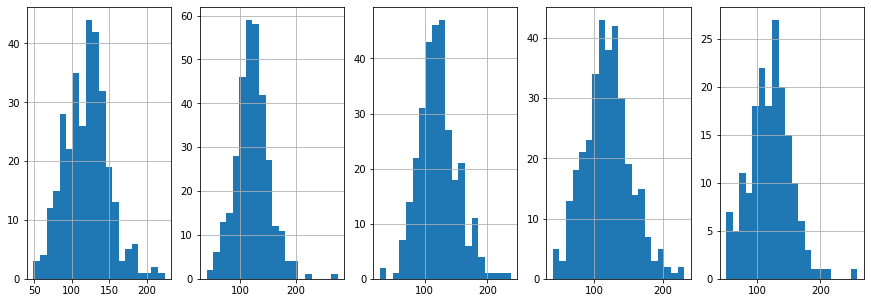

In [84]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(151)
ax1 = Y2006.hist(bins=20)
ax2 = fig.add_subplot(152)
ax2 = Y2007.hist(bins=20)
ax3 = fig.add_subplot(153)
ax3 = Y2008.hist(bins=20)
ax4 = fig.add_subplot(154)
ax4 = Y2009.hist(bins=20)
ax5 = fig.add_subplot(155)
ax5 = Y2010.hist(bins=20)

### It looks like there is no obvious change during year for mean PPLSF. Let test Y2007 and Y2009.
### Null hypothesis would be: there is no difference between 2007 and 2009.

In [86]:
ttest_ind(Y2007,Y2009,equal_var = True) 

Ttest_indResult(statistic=0.8548212202635521, pvalue=0.39295798040706165)

In [120]:
ttest_ind(Y2007,Y2009,equal_var = False) 

Ttest_indResult(statistic=0.8559427222757352, pvalue=0.3923392786528672)

#### The p value is big enough (>0.05), we could not reject null hypothesis.

## Observation 3: Whether townhouse inside unit has different PPLSF than townhouse end unit

In [107]:
Single = df.loc[df.BldgType == '1Fam'].PPLSF
TownH = df.loc[df.BldgType == 'TwnhsE'].PPLSF

In [108]:
Single.shape,TownH.shape

((1220,), (114,))

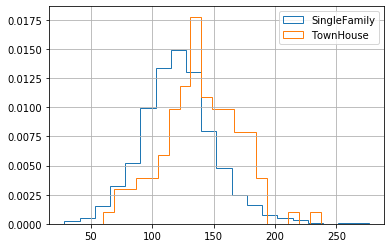

In [124]:
Single.hist(histtype='step',bins=20,label = 'SingleFamily',normed = True)
TownH.hist(histtype='step',bins=20,label='TownHouse', normed = True)
plt.legend()

### Hypothesis 3: Single Family house has the same Price per square feet with TownHouse

In [113]:
ttest_ind(Single,TownH,equal_var = True) 

Ttest_indResult(statistic=-5.95334927414826, pvalue=3.355238005363966e-09)

In [114]:
ttest_ind(Single,TownH,equal_var = False) 

Ttest_indResult(statistic=-5.801430756457911, pvalue=4.531556117720209e-08)

#### either way, p value is low (<0.05), reject hypothesis. 
### Conclusion: single family has different price than Town house.